## Load a trained neural network model

We use the pre-trained model `musicnn` [1].

```(bash)
pip install musicnn_keras
```

[1] [musicnn_keras](https://github.com/Quint-e/musicnn_keras)

In [1]:
import tensorflow as tf
from musicnn_keras.tagger import top_tags


musicnn = tf.keras.models.load_model(
    './musicnn_keras/keras_checkpoints/MSD_musicnn.h5')

/Users/dc/miniconda3/envs/env36/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# synthesize MIDI to audio
from midi2audio import FluidSynth

_AUDIO_ROOT_PATH = rf'audio/'
_AUDIO_FILE = rf'HighwayToHell_cut'
_MID = rf'.midi'
_MP3 = rf'.mp3'

# using the default sound font in 44100 Hz sample rate
fs = FluidSynth()
fs.midi_to_audio(f'{_AUDIO_ROOT_PATH}{_AUDIO_FILE}{_MID}',
                 f'{_AUDIO_ROOT_PATH}{_AUDIO_FILE}{_MP3}')


In [ ]:

top_tags('audio/audio_TRWJAZW128F42760DD_test.mp3',
         model='MTT_musicnn', topN=10)

## Extract the Taggram

In [2]:
from musicnn_keras.extractor import extractor

_FILE_NAME='audio/instruments/HighwayToHell_solo_AcousticGuitar_original_C#major.mp3'

taggram, tags, features = extractor(_FILE_NAME, model='MTT_vgg', extract_features=True)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f8731d5d620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


In [12]:
print(tags)

50


In [4]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
%matplotlib inline


def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates)
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')')
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time)', fontsize=fontsize)


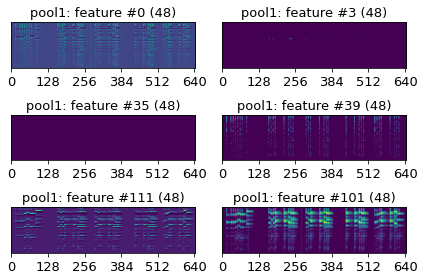

In [5]:
# visualize pool1 features!
gs = gridspec.GridSpec(3, 2)  # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool1'][:, :, 0],
                coordinates=gs[0, 0],
                title='pool1: feature #0',
                xlabel=False)

depict_features(features=features['pool1'][:, :, 35],
                coordinates=gs[1, 0],
                title='pool1: feature #35',
                xlabel=False)

depict_features(features=features['pool1'][:, :, 111],
                coordinates=gs[2, 0],
                title='pool1: feature #111',
                xlabel=False)

depict_features(features=features['pool1'][:, :, 3],
                coordinates=gs[0, 1],
                title='pool1: feature #3',
                xlabel=False)

depict_features(features=features['pool1'][:, :, 39],
                coordinates=gs[1, 1],
                title='pool1: feature #39',
                xlabel=False)

depict_features(features=features['pool1'][:, :, 101],
                coordinates=gs[2, 1],
                title='pool1: feature #101',
                xlabel=False)

plt.tight_layout()
plt.show()


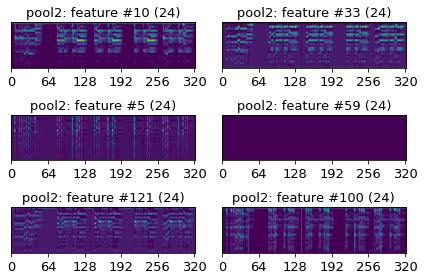

In [6]:
# visualize pool2 features!
gs = gridspec.GridSpec(3, 2)  # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool2'][:, :, 10],
                coordinates=gs[0, 0],
                title='pool2: feature #10',
                xlabel=False)

depict_features(features=features['pool2'][:, :, 5],
                coordinates=gs[1, 0],
                title='pool2: feature #5',
                xlabel=False)

depict_features(features=features['pool2'][:, :, 121],
                coordinates=gs[2, 0],
                title='pool2: feature #121',
                xlabel=False)

depict_features(features=features['pool2'][:, :, 33],
                coordinates=gs[0, 1],
                title='pool2: feature #33',
                xlabel=False)

depict_features(features=features['pool2'][:, :, 59],
                coordinates=gs[1, 1],
                title='pool2: feature #59',
                xlabel=False)

depict_features(features=features['pool2'][:, :, 100],
                coordinates=gs[2, 1],
                title='pool2: feature #100',
                xlabel=False)

plt.tight_layout()
plt.show()


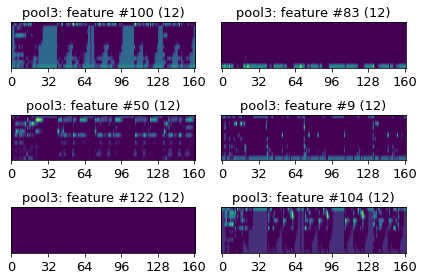

In [7]:
# visualize pool3 features!
gs = gridspec.GridSpec(3, 2)  # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool3'][:, :, 100],
                coordinates=gs[0, 0],
                title='pool3: feature #100',
                xlabel=False)

depict_features(features=features['pool3'][:, :, 50],
                coordinates=gs[1, 0],
                title='pool3: feature #50',
                xlabel=False)

depict_features(features=features['pool3'][:, :, 122],
                coordinates=gs[2, 0],
                title='pool3: feature #122',
                xlabel=False)

depict_features(features=features['pool3'][:, :, 83],
                coordinates=gs[0, 1],
                title='pool3: feature #83',
                xlabel=False)

depict_features(features=features['pool3'][:, :, 9],
                coordinates=gs[1, 1],
                title='pool3: feature #9',
                xlabel=False)

depict_features(features=features['pool3'][:, :, 104],
                coordinates=gs[2, 1],
                title='pool3: feature #104',
                xlabel=False)

plt.tight_layout()
plt.show()


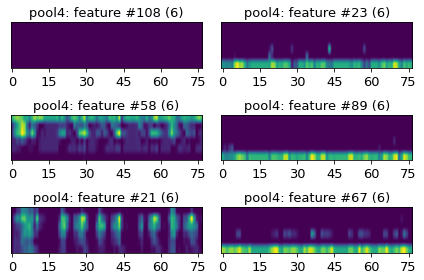

In [8]:
# visualize pool4 features!
gs = gridspec.GridSpec(3, 2)  # create a figure having 2 rows and 3 cols.

depict_features(features=features['pool4'][:, :, 108],
                coordinates=gs[0, 0],
                title='pool4: feature #108',
                xlabel=False)

depict_features(features=features['pool4'][:, :, 58],
                coordinates=gs[1, 0],
                title='pool4: feature #58',
                xlabel=False)

depict_features(features=features['pool4'][:, :, 21],
                coordinates=gs[2, 0],
                title='pool4: feature #21',
                xlabel=False)

depict_features(features=features['pool4'][:, :, 23],
                coordinates=gs[0, 1],
                title='pool4: feature #23',
                xlabel=False)

depict_features(features=features['pool4'][:, :, 89],
                coordinates=gs[1, 1],
                title='pool4: feature #89',
                xlabel=False)

depict_features(features=features['pool4'][:, :, 67],
                coordinates=gs[2, 1],
                title='pool4: feature #67',
                xlabel=False)

plt.tight_layout()
plt.show()


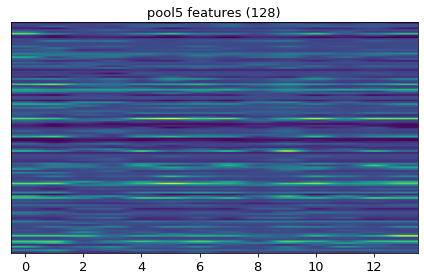

In [9]:
# visualize pool5 features!
gs = gridspec.GridSpec(1, 1)  # create a figure having 1 rows and 1 cols.

depict_features(features=features['pool5'],
                coordinates=gs[0, 0],
                title='pool5 features',
                xlabel=False)

plt.tight_layout()
plt.show()


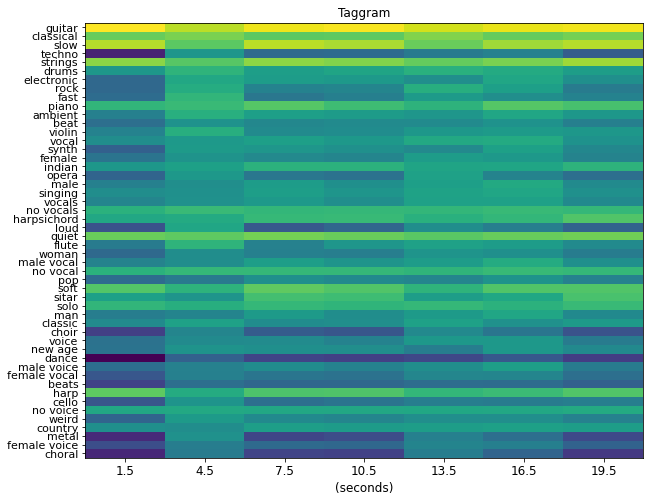

In [10]:
in_length = 3  # seconds -- by default, the model takes inputs of 3 seconds with no overlap

# depict taggram
plt.rcParams["figure.figsize"] = (10, 8)
fontsize = 12
fig, ax = plt.subplots()
ax.imshow(taggram.T, interpolation=None, aspect="auto")

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

plt.show()


In [ ]:
import music21

In [ ]:



s = music21.converter.parse('各自のパス/harunoumi_v2.xml')